# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Build query URL
query_url = f"{url}&APPID={weather_api_key}"

# Set up empty lists to hold data from call

city_name = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []

# Create a loop counter

count = 1

# Start of log statement

print(f"Beginning Data Retrieval")
print(f"-----------------------")

# Initialize loop

for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json()
    
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        current_city = response["name"]
        print(f"Processing Record {count} | {current_city}")
        
        count = count + 1 
    
    except:
        print("City not found...")
    continue
    

Beginning Data Retrieval
-----------------------
Processing Record 1 | Pinheiro Machado
Processing Record 2 | Coralville
Processing Record 3 | Dauphin
Processing Record 4 | Bodden Town
City not found...
Processing Record 5 | Makakilo City
Processing Record 6 | Malé
Processing Record 7 | Kabalo
Processing Record 8 | Bluff
Processing Record 9 | Avarua
Processing Record 10 | Jamestown
Processing Record 11 | Atocha
Processing Record 12 | Puerto Ayora
Processing Record 13 | Taltal
Processing Record 14 | Cidreira
City not found...
Processing Record 15 | Kondinskoye
Processing Record 16 | Basco
Processing Record 17 | Saskylakh
Processing Record 18 | Busselton
Processing Record 19 | Hermanus
Processing Record 20 | Palmer
Processing Record 21 | Yellowknife
Processing Record 22 | Qaanaaq
Processing Record 23 | Mahébourg
Processing Record 24 | Cape Town
Processing Record 25 | Barrow
Processing Record 26 | Castro
Processing Record 27 | Vaini
Processing Record 28 | Nikolskoye
Processing Record 29 |

Processing Record 240 | Los Llanos de Aridane
Processing Record 241 | Tungor
Processing Record 242 | Deputatsky
Processing Record 243 | Gao
Processing Record 244 | Sibolga
Processing Record 245 | Province of Groningen
Processing Record 246 | Ixtapa
Processing Record 247 | Gushikawa
City not found...
Processing Record 248 | Licata
Processing Record 249 | Kruisfontein
Processing Record 250 | Portland
Processing Record 251 | Bereda
Processing Record 252 | Port Elizabeth
Processing Record 253 | Finschhafen
Processing Record 254 | Dubbo
City not found...
Processing Record 255 | Csanytelek
Processing Record 256 | Kimbe
Processing Record 257 | Udachny
Processing Record 258 | Sobolevo
Processing Record 259 | Thinadhoo
Processing Record 260 | Tanete
Processing Record 261 | Pitimbu
Processing Record 262 | Agüimes
Processing Record 263 | Maniitsoq
Processing Record 264 | Koidu
Processing Record 265 | Erbaa
Processing Record 266 | Dudinka
Processing Record 267 | Itaituba
City not found...
City not

City not found...
Processing Record 474 | Kautokeino
Processing Record 475 | Beaver Dam
Processing Record 476 | Eufaula
Processing Record 477 | Tabat
Processing Record 478 | Söderhamn
Processing Record 479 | Beyneu
Processing Record 480 | Huai Yot
Processing Record 481 | Santa Rosa
Processing Record 482 | Youghal
Processing Record 483 | Pangnirtung
Processing Record 484 | Huarmey
Processing Record 485 | Inhambane
City not found...
Processing Record 486 | Ayan
Processing Record 487 | Rocha
Processing Record 488 | Homer
Processing Record 489 | Araguaçu
Processing Record 490 | Eureka
Processing Record 491 | Halifax
Processing Record 492 | Ginir
Processing Record 493 | Agirish
Processing Record 494 | Djibouti
Processing Record 495 | Shitkino
Processing Record 496 | Walvis Bay
Processing Record 497 | Nola
Processing Record 498 | Uyemskiy
Processing Record 499 | Serebryanyy Bor
Processing Record 500 | Chara
Processing Record 501 | Burnie
Processing Record 502 | Wāshīm
Processing Record 503 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Create dictionary with weather city data

weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longtitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date
}

# Convert dictionary to dataframe

weatherpy_data = pd.DataFrame(weather_dict)

weatherpy_data.to_csv('output_data/cities.csv')

weatherpy_data.head()

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Pinheiro Machado,BR,-31.5783,-53.3811,66.0,92,13,13.00,1612911832
1,Coralville,US,41.6764,-91.5805,3.2,60,1,5.75,1612911832
2,Dauphin,CA,51.1494,-100.0502,-11.2,58,1,23.02,1612911832
3,Bodden Town,KY,19.2833,-81.2500,82.4,69,20,11.50,1612911832
4,Makakilo City,US,21.3469,-158.0858,78.8,41,20,11.50,1612911832


In [68]:
# Display dataframe stats with describe function

weatherpy_data.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.850462,19.767663,49.216417,73.944742,53.925134,7.883512,1.612912e+09
std,33.032555,93.951929,32.776724,19.154414,38.777544,5.961926,7.283642e+01
min,-54.800000,-175.200000,-38.200000,8.000000,0.000000,0.180000,1.612912e+09
25%,-5.833300,-65.712500,26.010000,67.000000,16.000000,3.440000,1.612912e+09
50%,20.866700,25.086500,63.000000,79.000000,64.000000,6.330000,1.612912e+09
75%,48.826400,107.810600,75.450000,88.000000,90.000000,11.010000,1.612912e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,36.820000,1.612912e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
weatherpy_data = weatherpy_data[weatherpy_data["Humidity"] <= 100]

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Pinheiro Machado,BR,-31.5783,-53.3811,66.00,92,13,13.00,1612911832
1,Coralville,US,41.6764,-91.5805,3.20,60,1,5.75,1612911832
2,Dauphin,CA,51.1494,-100.0502,-11.20,58,1,23.02,1612911832
3,Bodden Town,KY,19.2833,-81.2500,82.40,69,20,11.50,1612911832
4,Makakilo City,US,21.3469,-158.0858,78.80,41,20,11.50,1612911832
...,...,...,...,...,...,...,...,...,...
556,Nelson Bay,AU,-32.7167,152.1500,68.00,100,90,8.05,1612911709
557,Yokadouma,CM,3.5167,15.0500,69.75,24,83,2.59,1612911879
558,Chapais,CA,49.7834,-74.8492,6.80,85,90,3.44,1612911879
559,Waingapu,ID,-9.6567,120.2641,79.25,80,97,5.77,1612911587


In [89]:
#weatherpy_data.replace(lambda x: x > 100, "")

weatherpy_data

,City,Country,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Pinheiro Machado,BR,-31.5783,-53.3811,66.00,92,13,13.00,1612911832
1,Coralville,US,41.6764,-91.5805,3.20,60,1,5.75,1612911832
2,Dauphin,CA,51.1494,-100.0502,-11.20,58,1,23.02,1612911832
3,Bodden Town,KY,19.2833,-81.2500,82.40,69,20,11.50,1612911832
4,Makakilo City,US,21.3469,-158.0858,78.80,41,20,11.50,1612911832
...,...,...,...,...,...,...,...,...,...
556,Nelson Bay,AU,-32.7167,152.1500,68.00,100,90,8.05,1612911709
557,Yokadouma,CM,3.5167,15.0500,69.75,24,83,2.59,1612911879
558,Chapais,CA,49.7834,-74.8492,6.80,85,90,3.44,1612911879
559,Waingapu,ID,-9.6567,120.2641,79.25,80,97,5.77,1612911587


In [63]:
weatherpy_data[0]

0      87
1      75
2      71
3      88
4      51
       ..
560    51
561    77
562    86
563    78
564    59
Name: Humidity, Length: 564, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

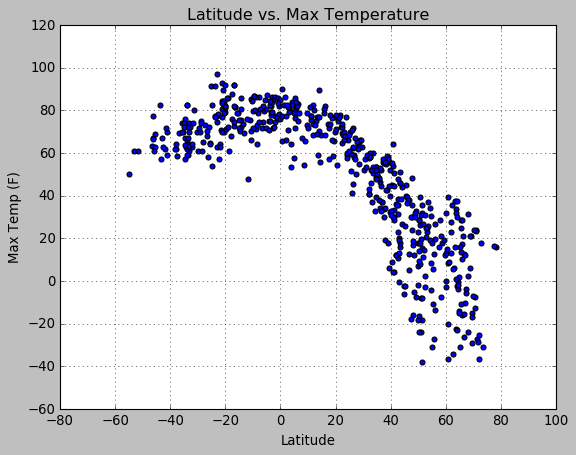

In [43]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latmaxtemp.png")

plt.show()

## Latitude vs. Humidity Plot

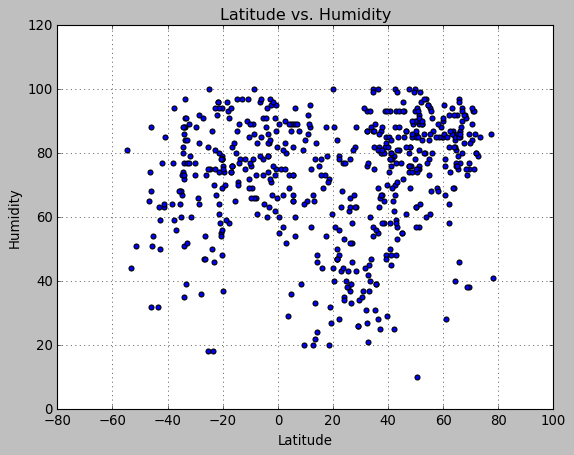

In [44]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lathumidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

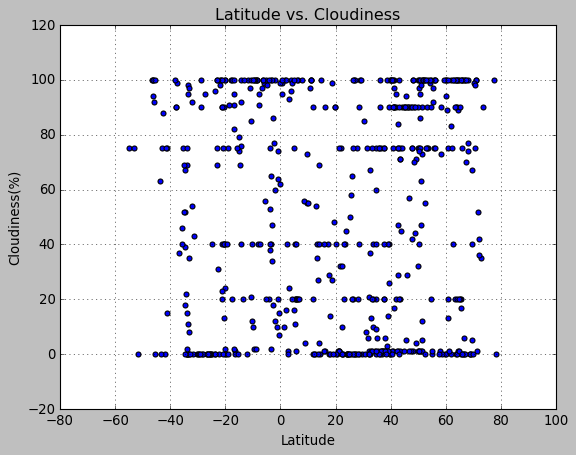

In [45]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Cloudiness']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latcloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

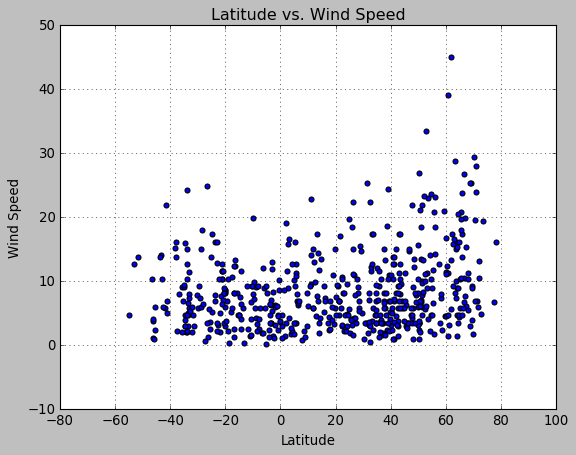

In [46]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']
plt.scatter(x_values, y_values)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latwindspeed.png")

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6111120884275737


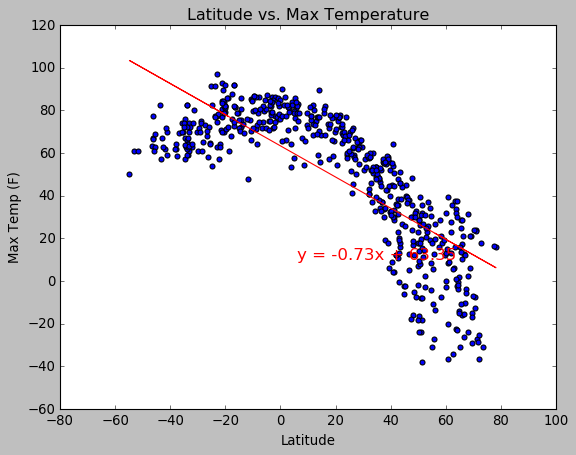

<Figure size 640x480 with 0 Axes>

In [47]:
#x_values = weatherpy_data[weatherpy_data['Latitude']>0]
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_north.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6111120884275737


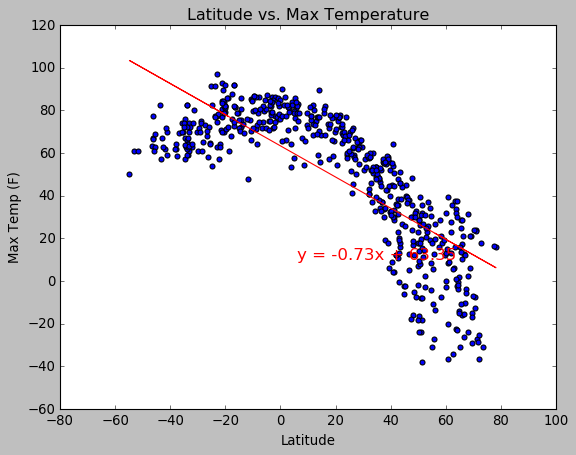

<Figure size 640x480 with 0 Axes>

In [48]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latmaxtempregression_south.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013682482012066028


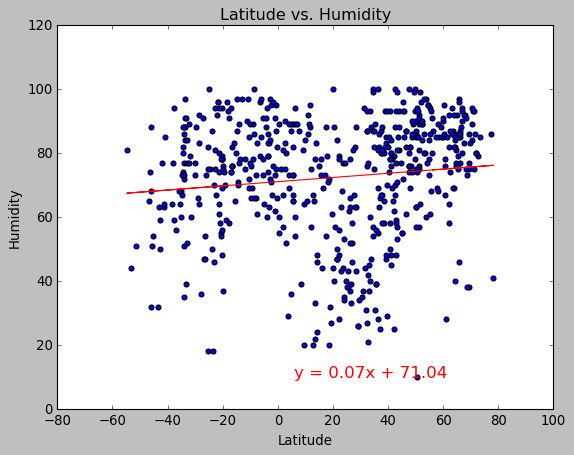

<Figure size 640x480 with 0 Axes>

In [49]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_north.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013682482012066028


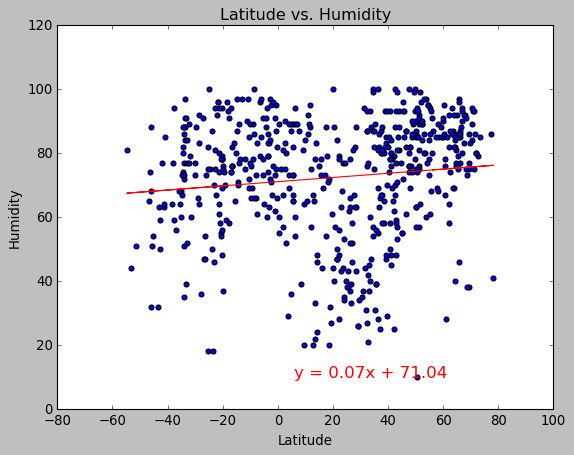

<Figure size 640x480 with 0 Axes>

In [50]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/lathumidityregression_south.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07563574851972898


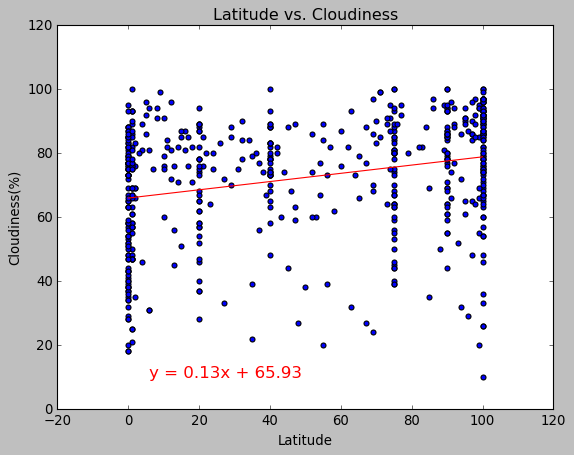

<Figure size 640x480 with 0 Axes>

In [51]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_north.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07563574851972898


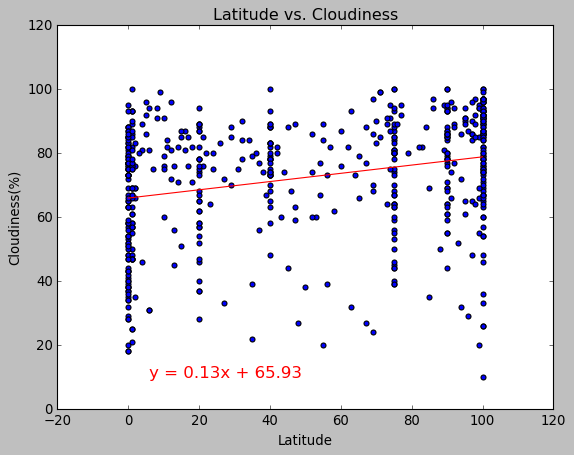

<Figure size 640x480 with 0 Axes>

In [52]:
x_values = weatherpy_data['Cloudiness']
y_values = weatherpy_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latcloudinessregression_south.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.046862572593069876


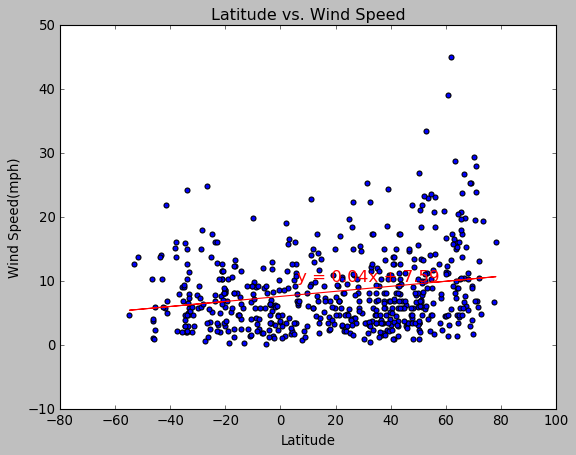

<Figure size 640x480 with 0 Axes>

In [53]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_north.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.046862572593069876


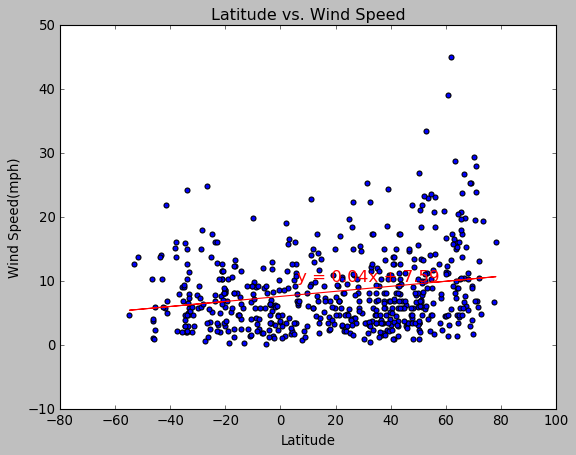

<Figure size 640x480 with 0 Axes>

In [54]:
x_values = weatherpy_data['Latitude']
y_values = weatherpy_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("output_data/latwindregression_south.png")

plt.show()